# Exploring the "Top 10 Highest Grossing Films (1975-2018)" Dataset

# Step 1: Identify the Problem

We will investigate the "Top 10 Highest Grossing Films (1975-2018)" dataset provided by IMDb. Following are some possible things we can explore from the data:
1. **Clustering Problems**<br>
    1.1. *Genre Clustering.*<br> We can cluster movies based on their genres. Three columns are of interest: "Main_Genre," "Genre_2," and "Genre_3." Using these three columns we can group movies together based on similarities. This can possibly be done via K-clustering. <br>
2. **Regression Problems**<br>
    2.1. *Box Office Performance Prediction.* <br>A regression problem could be to predict a movie's boxx office gross based on several features.<br>

# Step 2: Get the data

In [47]:
import os
import pandas as pd
import urllib.request
import requests

def load_movies_data():
    github_url = "https://raw.githubusercontent.com/dmml-heriot-watt/group-coursework-ha/main/data/blockbusters.csv?token=GHSAT0AAAAAACH2S322U4CX36PECSXQXBY2ZITDGAA"
    requests.get(github_url)
    return pd.read_csv(github_url)

Load the movies dataset:

In [48]:
movies = load_movies_data()

Ensure the dataet was loaded:

In [49]:
movies

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018
...,...,...,...,...,...,...,...,...,...,...,...
432,Thriller,Crime,Comedy,7.1,113,6,G,Metro-Goldwyn-Mayer,The Return of the Pink Panther,"$41,833,347.00",1975
433,Music,Drama,Comedy,6.4,136,7,PG,Columbia Pictures,Funny Lady,"$39,000,000.00",1975
434,Family,Western,Comedy,6.2,100,8,G,Walt Disney Pictures,The Apple Dumpling Gang,"$36,853,000.00",1975
435,Drama,NaN,NaN,6.0,88,9,PG,Columbia Pictures,"Aloha, Bobby and Rose","$35,000,000.00",1975


# Step 3: Explore the Data

Display the DataFrame:

In [42]:
movies.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


Get a quick description of the movies dataset:

In [33]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Main_Genre       437 non-null    object 
 1   Genre_2          408 non-null    object 
 2   Genre_3          296 non-null    object 
 3   imdb_rating      437 non-null    float64
 4   length           437 non-null    int64  
 5   rank_in_year     437 non-null    int64  
 6   rating           437 non-null    object 
 7   studio           437 non-null    object 
 8   title            437 non-null    object 
 9   worldwide_gross  437 non-null    object 
 10  year             437 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 37.7+ KB


In [40]:
movies.head()

,Main_Genre,Genre_2,Genre_3,imdb_rating,length,rank_in_year,rating,studio,title,worldwide_gross,year
0,Action,Adventure,Drama,7.4,135,1,PG-13,Walt Disney Pictures,Black Panther,"$700,059,566",2018
1,Action,Adventure,Sci-Fi,8.5,156,2,PG-13,Walt Disney Pictures,Avengers: Infinity War,"$678,815,482",2018
2,Animation,Action,Adventure,7.8,118,3,PG,Pixar,Incredibles 2,"$608,581,744",2018
3,Action,Adventure,Drama,6.2,129,4,PG-13,Universal Pictures,Jurassic World: Fallen Kingdom,"$416,769,345",2018
4,Action,Comedy,NaN,7.8,119,5,R,20th Century Fox,Deadpool 2,"$318,491,426",2018


There are 437 instances in the dataset; however, we can notice that some features have rows with missing values. These features are:<br>
1. Genre_2 <br>
2. Genre_3 <br>
<br>Another thing to notice is that most of the attributes are non-numerical. We will eventually need to handle them by converting them into a numerical form. It is worth noting that most of these attributes are categorical.

Let's explore the non-numerical attributes:

In [50]:
movies["Main_Genre"].value_counts()

Thriller     63
Comedy       55
Fantasy      54
Sci-Fi       50
Romance      48
Action       30
Drama        30
Animation    22
Crime        17
Family       16
Adventure    13
War          10
Music         9
Horror        8
Sport         7
History       5
Name: Main_Genre, dtype: int64

In [51]:
movies["Genre_2"].value_counts()

Adventure      125
Drama           67
Comedy          66
Action          29
Animation       28
Family          20
Crime           19
Mystery          9
Sci-Fi           9
Fantasy          9
Music            6
Horror           6
Romance          4
Western          4
History          3
Musical          2
Documentary      2
Name: Genre_2, dtype: int64

In [52]:
movies["Genre_3"].value_counts()

Action       126
Adventure     64
Comedy        36
Drama         28
Animation     12
Crime          6
Sci-Fi         4
Mystery        4
Western        4
Biography      4
Family         3
Fantasy        3
Thriller       1
War            1
Name: Genre_3, dtype: int64

In [53]:
movies["rating"].value_counts()

PG-13    171
PG       138
R        102
G         26
Name: rating, dtype: int64

In [54]:
movies["studio"].value_counts()

Warner Bros                      87
Walt Disney Pictures             65
Paramount Pictures               58
Universal Pictures               56
20th Century Fox                 48
Columbia Pictures                36
Metro-Goldwyn-Mayer              34
Sony Pictures                    17
DreamWorks                       12
Lionsgate Films                  10
Pixar                             9
Newmarket Films                   1
IFC Films                         1
Embassy Pictures                  1
National Air and Space Museum     1
Sunn Classic Pictures             1
Name: studio, dtype: int64

In [55]:
movies["title"].value_counts()

King Kong                                   2
Black Panther                               1
Teenage Mutant Ninja Turtles                1
The Little Mermaid                          1
Ghostbusters II                             1
                                           ..
Spider-Man 2                                1
Harry Potter and the Prisoner of Azkaban    1
Shrek 2                                     1
Hitch                                       1
The Other Side of the Mountain              1
Name: title, Length: 436, dtype: int64

In [56]:
movies["worldwide_gross"].value_counts()

$700,059,566        1
$201,965,915.00     1
$161,001,698.00     1
$184,155,863.00     1
$215,394,738.00     1
                   ..
$783,766,341.00     1
$795,634,069.00     1
$919,838,758.00     1
$368,100,420.00     1
$34,673,100.00      1
Name: worldwide_gross, Length: 437, dtype: int64

The following are the categorical attributes:
1. Main_Genre
2. Genre_2 
3. Genre_3 
4. rating 
5. studio

Since we are (potentially) going to explore a regression problem that is concerned with the box office performance of movies, it is wise to convert the values in the rows to numerical values.

In [58]:
import pandas as pd

Remove dollar signs and commas and convert to floats:

In [59]:
movies["worldwide_gross"] = movies["worldwide_gross"].str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Rami\AppData\Local\Temp\ipykernel_32032\2329256677.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies["worldwide_gross"] = movies["worldwide_gross"].str.replace('$', '').str.replace(',', '').astype(float)


Ensure that the movies DataFrame has been updated:

In [60]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Main_Genre       437 non-null    object 
 1   Genre_2          408 non-null    object 
 2   Genre_3          296 non-null    object 
 3   imdb_rating      437 non-null    float64
 4   length           437 non-null    int64  
 5   rank_in_year     437 non-null    int64  
 6   rating           437 non-null    object 
 7   studio           437 non-null    object 
 8   title            437 non-null    object 
 9   worldwide_gross  437 non-null    float64
 10  year             437 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 37.7+ KB


In [61]:
movies["worldwide_gross"].head()

0    700059566.0
1    678815482.0
2    608581744.0
3    416769345.0
4    318491426.0
Name: worldwide_gross, dtype: float64

Get a statistical description of the data:

In [62]:
movies.describe()

,imdb_rating,length,rank_in_year,worldwide_gross,year
count,437.000000,437.000000,437.000000,4.370000e+02,437.000000
mean,7.076659,119.871854,5.524027,3.902409e+08,1996.647597
std,0.820273,22.744332,2.869884,3.158344e+08,12.630396
min,4.400000,27.000000,1.000000,3.467310e+07,1975.000000
25%,6.500000,103.000000,3.000000,1.239224e+08,1986.000000
50%,7.100000,118.000000,6.000000,3.342011e+08,1997.000000
75%,7.700000,134.000000,8.000000,5.537098e+08,2008.000000
max,9.000000,201.000000,10.000000,2.749064e+09,2018.000000


### Data Visualization

Let's plot a histogram for each numerical attribute:

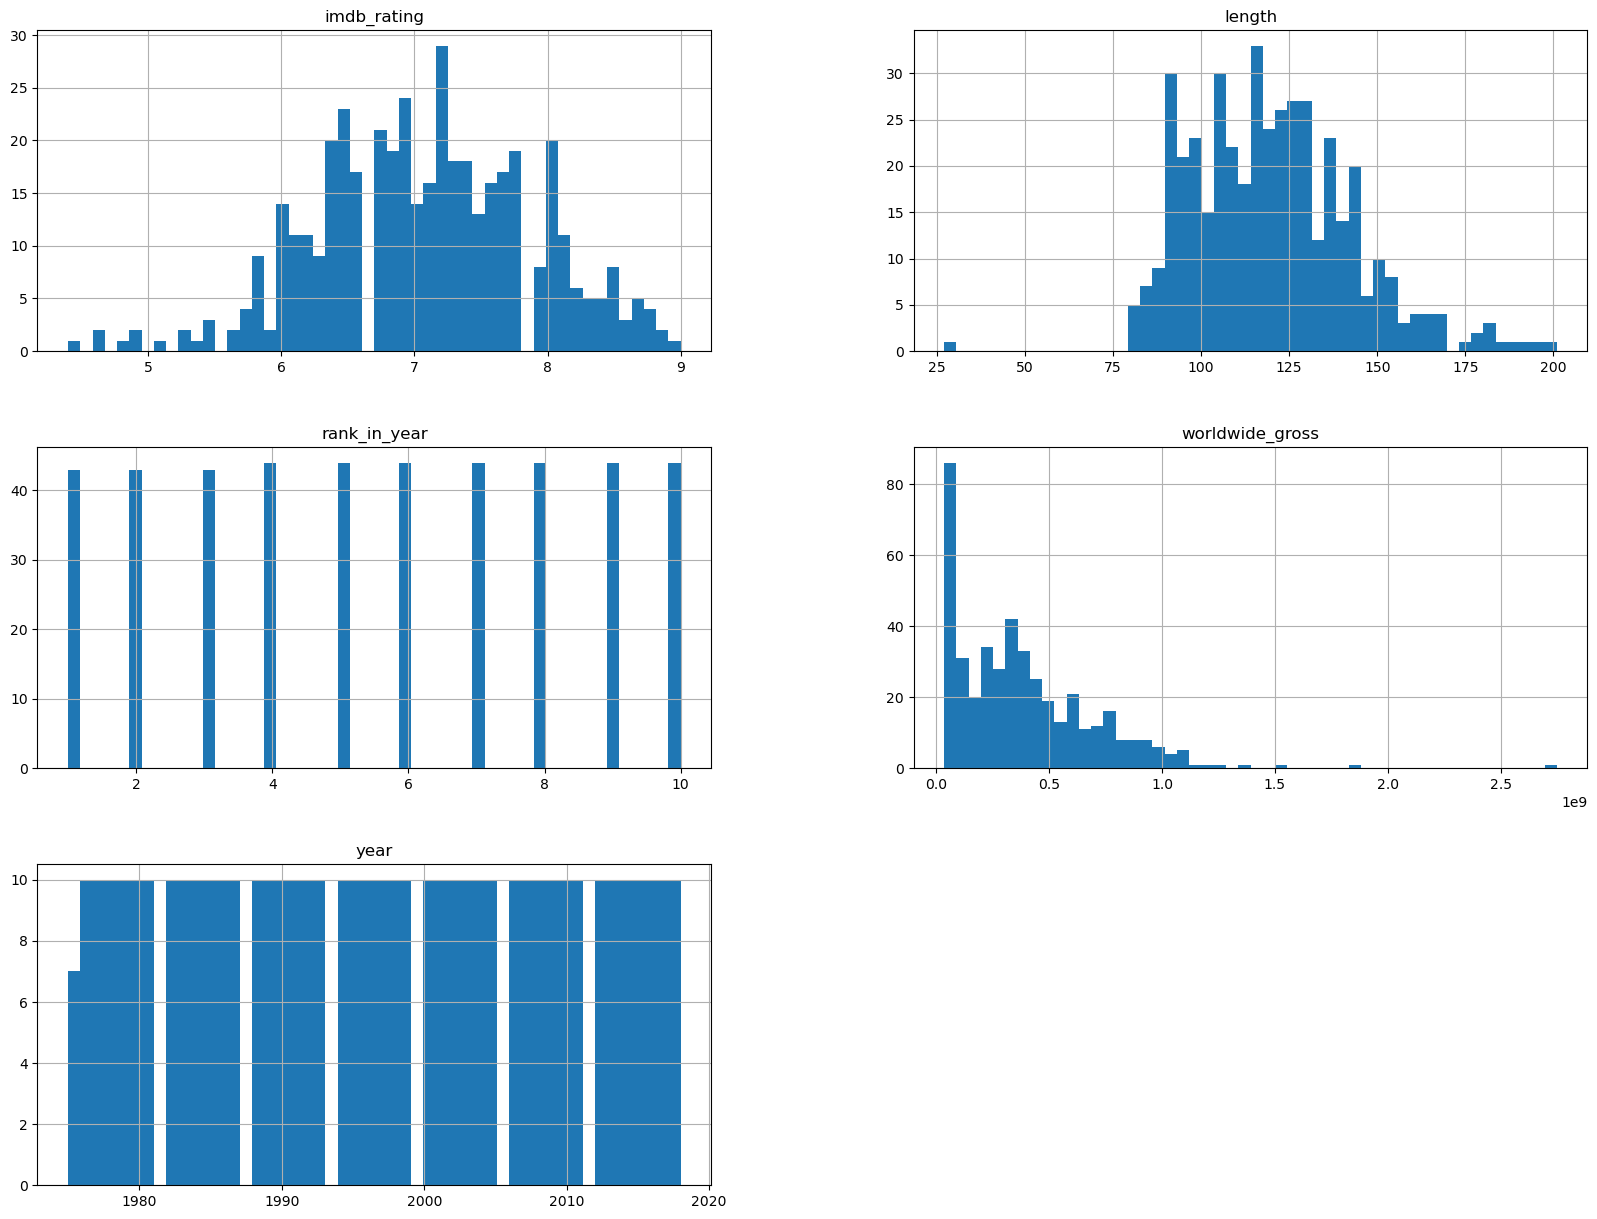

In [63]:
import matplotlib.pyplot as plt
movies.hist(bins=50, figsize=(20,15))
plt.show()

Let's plot the genre distribution:

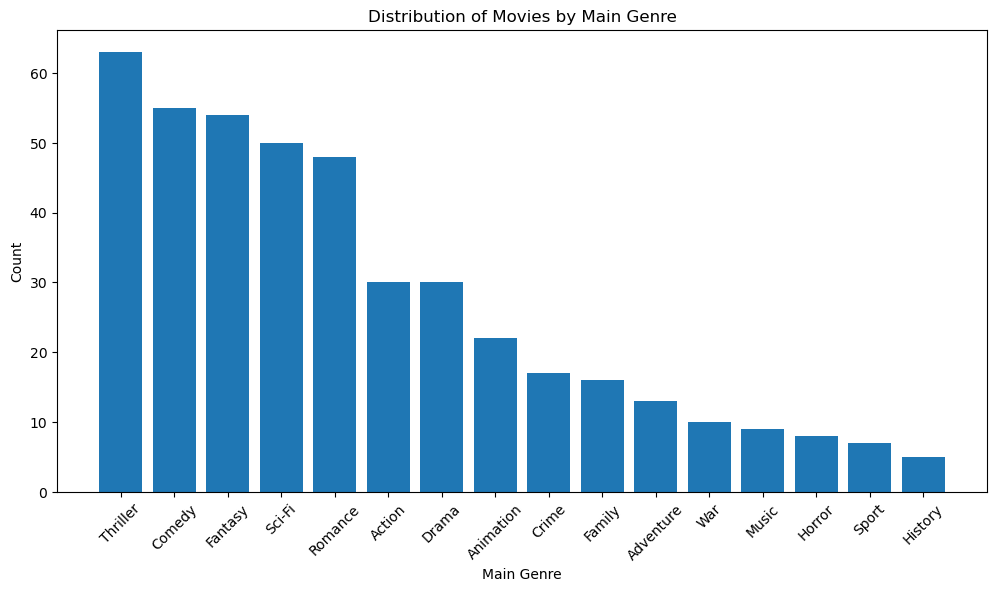

In [64]:
genre_counts = movies["Main_Genre"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Main Genre")
plt.xlabel("Main Genre")
plt.ylabel("Count")
plt.show()

Let's plot the rating distribution:

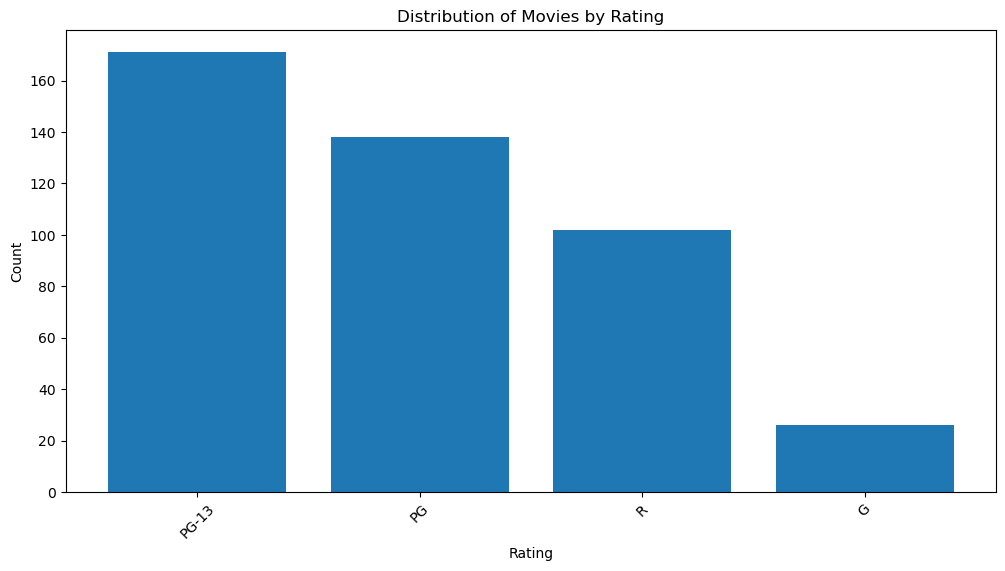

In [65]:
rating_counts = movies["rating"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Movies by Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

Let's plot the studio distribution:

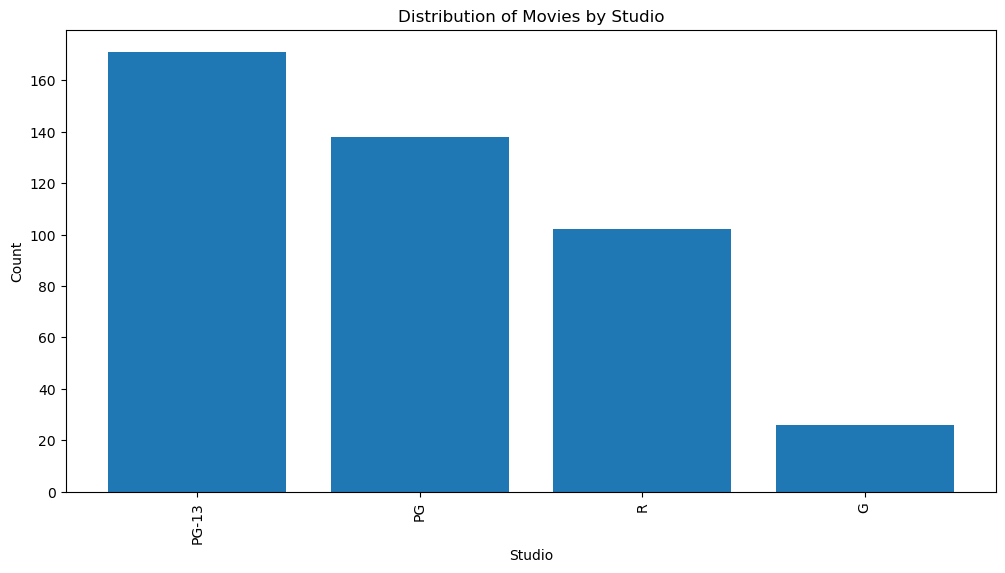

In [66]:
studio_counts = movies["studio"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(rating_counts.index, rating_counts.values)
plt.xticks(rotation=90)
plt.title("Distribution of Movies by Studio")
plt.xlabel("Studio")
plt.ylabel("Count")
plt.show()

#### Scatter Plots

Rating vs. Box Office Performance:

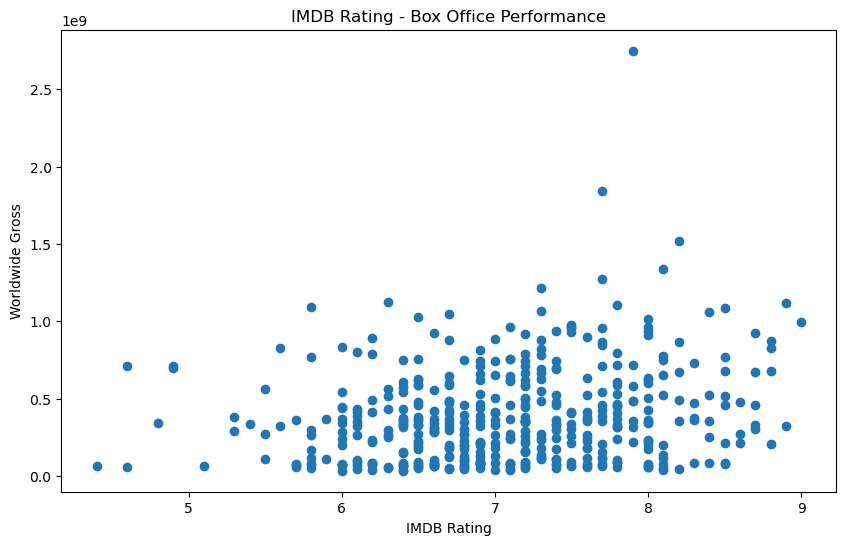

In [68]:
plt.figure(figsize=(10,6))
plt.scatter(movies["imdb_rating"], movies["worldwide_gross"])
plt.title("IMDB Rating - Box Office Performance")
plt.xlabel("IMDB Rating")
plt.ylabel("Worldwide Gross")
plt.show()

Genre - Box Office Performance:

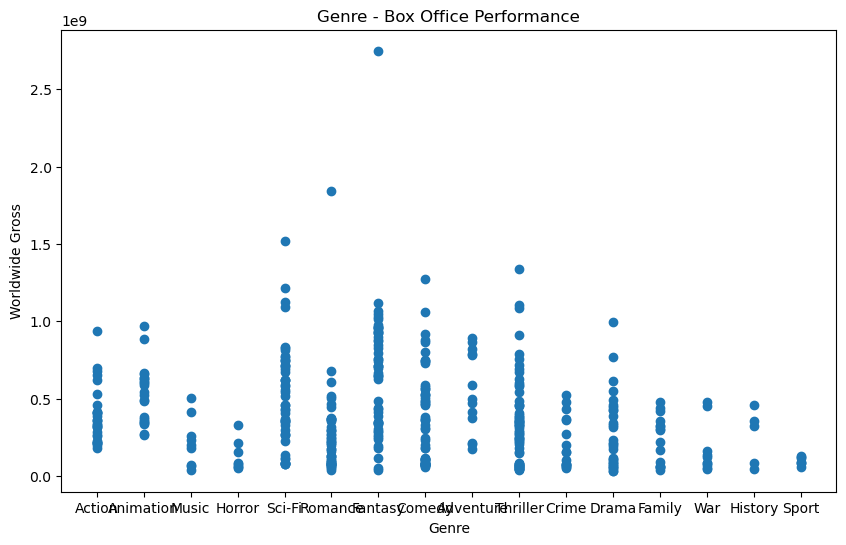

In [69]:
plt.figure(figsize=(10,6))
plt.scatter(movies["Main_Genre"], movies["worldwide_gross"])
plt.title("Genre - Box Office Performance")
plt.xlabel("Genre")
plt.ylabel("Worldwide Gross")
plt.show()